In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")
%load_ext nb_black

ModuleNotFoundError: ignored

In [ ]:
df = pd.DataFrame({
    'color': ['Red', 'Red', 'Red', 'Yellow', 'Yellow', 'Yellow', 'Yellow', 'Yellow', 'Red', 'Red'],
    'type': ['Sports', 'Sports', 'Sports', 'Sports', 'Sports', 'SUV', 'SUV', 'SUV', 'SUV', 'Sports'],
    'origin': ['Domestic', 'Domestic', 'Domestic', 'Domestic', 'Imported', 'Imported', 'Imported', 'Domestic', 'Imported', 'Imported'],
    'stolen': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes']    
})
df

,color,type,origin,stolen
0,Red,Sports,Domestic,Yes
1,Red,Sports,Domestic,No
2,Red,Sports,Domestic,Yes
3,Yellow,Sports,Domestic,No
4,Yellow,Sports,Imported,Yes
5,Yellow,SUV,Imported,No
6,Yellow,SUV,Imported,Yes
7,Yellow,SUV,Domestic,No
8,Red,SUV,Imported,No
9,Red,Sports,Imported,Yes


## Không biến đổi các thuộc tính

In [ ]:
X = df.drop(columns=['stolen'])
y = df.stolen

In [ ]:
#Vì target là classification => chọn decision tree classification 
from sklearn.tree import DecisionTreeClassifier


In [ ]:
model = DecisionTreeClassifier().fit(X, y)

ValueError: could not convert string to float: 'Red'

In [ ]:
'''

=> lỗi 
=> cần biến đổi các thuộc tính!
'''

'\n=> lỗi \n=> cần biến đổi các thuộc tính!\n'

# A. DecisionTree For Classification

## Decision Tree có thể áp dụng cho target dạng label nhưng tập input phải đổi qua dạng số.
### Biến đổi các thuộc tính của tập X

In [ ]:
'''
Nếu ko dùng drop_first => sẽ có nhiều thuộc tính => decision tree sẽ có độ cao lớn
=> drop_first = True: nếu đã red thì ko thể nào là yellow dc, yellow ko thể là red...
'''

X_fix = pd.get_dummies(data = X, drop_first = True) # bỏ bớt thuộc tính cho gọn
X_fix

,color_Yellow,type_Sports,origin_Imported
0,0,1,0
1,0,1,0
2,0,1,0
3,1,1,0
4,1,1,1
5,1,0,1
6,1,0,1
7,1,0,0
8,0,0,1
9,0,1,1


In [ ]:
#Vì target là classification => chọn decision tree classification 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X_fix, y)

In [ ]:
# Red, SUV, Domestic => Stolen?
## X_fix = [[color_Yellow	type_Sports	origin_Imported]]
## X_test = [[0,0,0]]
X_test = [[0, 0, 0]]
y_test = model.predict(X_test)
y_test

array(['No'], dtype=object)

<IPython.core.display.Javascript object>

In [ ]:
"""
=> color_Yellow	type_Sports	origin_Imported thì stolen = No
"""

'\n=> color_Yellow\ttype_Sports\torigin_Imported thì stolen = No\n'

<IPython.core.display.Javascript object>

# A2. Decision Tree For Classification

In [ ]:
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
X = df.drop(columns=["species"])
y = df.species

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# mặc định criterion = 'gini', có thể thay = entropy, ...
# gini dùng dc cho cả bài toàn dùng entropy
# gini tốt hơn cho các continuous features còn entropy phù hợp với các categorical features
# gini giảm trường hợp phân lớp nhầm (miss class)
# entropy thường dùng để phân tích khám phá dữ liệu, tốc độ xử lý của entropy chậm hơn.

model = DecisionTreeClassifier(criterion="gini").fit(X, y)
model

DecisionTreeClassifier()

In [ ]:
### Đo độ chính xác của  model

In [ ]:
print("R-score:", model.score(X, y))
# print()

R-score: 1.0


In [ ]:
#  sepal_length, sepal_width, petal_length, petal_width => species
X_test = [[3.5, 1.4, 7.4, 2.2], [0.5, 2.5, 2, 1.6], [0.3, 5.4, 2, 5.4]]
y_test = model.predict(X_test)
y_test

array(['virginica', 'setosa', 'setosa'], dtype=object)

### Trực quan (Decision Tree Visualization)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from IPython.display import Image
import pydotplus
from sklearn import tree

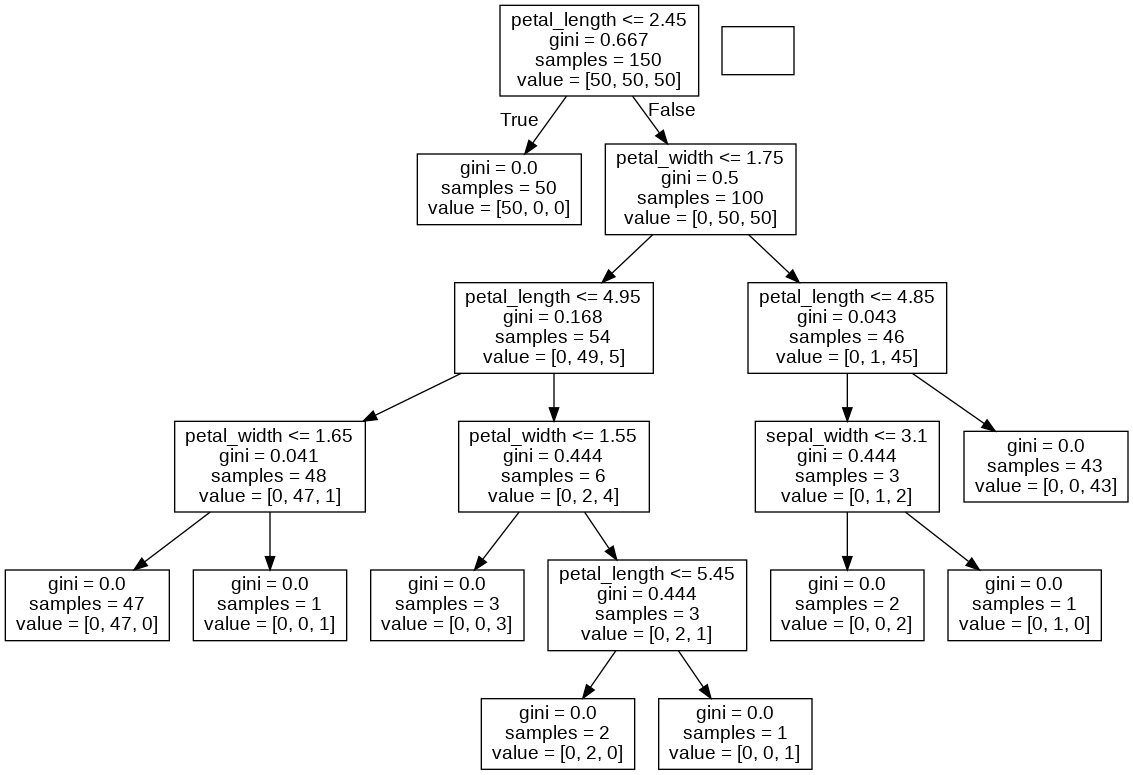

In [ ]:
dot_data = tree.export_graphviz(model, out_file=None, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
# save pdf
graph.write_pdf('iris_decision_tree.pdf')

#save image
graph.write_pdf('iris_decision_tree.png')

True

In [13]:
with open ('iris_decision_tree.txt', 'w') as f:
  f = tree.export_graphviz(model, out_file=f, feature_names=X.columns, class_names=df['species'])


In [16]:
import PIL.Image as Image
photo = Image.open('iris_decision_tree.png')
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(photo)

UnidentifiedImageError: ignored